<a href="https://colab.research.google.com/github/dipeshkumar123/hyperlocal-marketplace/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **📌 Step 1: Data Preprocessing & Exploration**  

#### **➡️ Task: Load and Analyze the Datasets**  
This step will:  
✅ Read all datasets into Pandas DataFrames.  
✅ Clean and structure the data for NLP training.  
✅ Visualize key insights from the data.  

---

🔹 Commodity Prices Dataset:
  commodity_name    state    district    market  min_price  max_price  \
0          Ajwan  Gujarat      Amreli    Amreli      63.25      79.55   
1          Ajwan  Gujarat  Banaskanth   Dhanera      80.05      80.05   
2          Ajwan  Gujarat    Jamnagar  Jamnagar      90.00     155.00   
3          Ajwan  Gujarat     Mehsana      Kadi      94.50     112.50   
4          Ajwan  Gujarat     Mehsana     Unjha      21.25     148.50   

   modal_price        date  
0        79.55  2019-05-22  
1        80.05  2019-05-22  
2       122.50  2019-05-22  
3       107.00  2019-05-22  
4        99.75  2019-05-22   

🔹 Crop Data Dataset:
     N   P    K   ph    EC     S     Cu      Fe     Mn     Zn      B  \
0  143  69  217  5.9  0.58  0.23  10.20  116.35  59.96  54.85  21.29   
1  170  36  216  5.9  0.15  0.28  15.69  114.20  56.87  31.28  28.62   
2  158  66  219  6.8  0.34  0.20  15.29   65.87  51.81  57.12  27.59   
3  133  45  207  6.4  0.94  0.21   8.48  103.10 

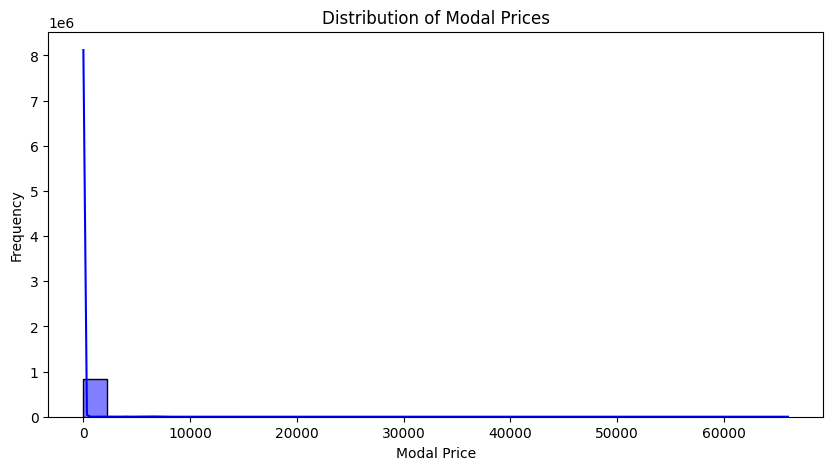

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets (Assuming CSV format)
commodity_prices = pd.read_csv("commodity_prices.csv")  # Market price dataset
crop_data = pd.read_csv("crop_data.csv")  # Crop features dataset
farmer_queries = pd.read_csv("farmer_queries.csv")  # Farmer questions dataset
faq_dataset = pd.read_csv("faq_dataset.csv")  # General farming FAQs dataset
weather_data = pd.read_csv("weather_data.csv")  # Weather conditions dataset

# Display first few rows of each dataset
print("🔹 Commodity Prices Dataset:")
print(commodity_prices.head(), "\n")

print("🔹 Crop Data Dataset:")
print(crop_data.head(), "\n")

print("🔹 Farmer Queries Dataset:")
print(farmer_queries.head(), "\n")

print("🔹 FAQ Dataset:")
print(faq_dataset.head(), "\n")

print("🔹 Weather Data Dataset:")
print(weather_data.head(), "\n")

# Check for missing values
print("✅ Missing Values in Datasets:")
print(commodity_prices.isnull().sum())
print(crop_data.isnull().sum())
print(farmer_queries.isnull().sum())
print(faq_dataset.isnull().sum())
print(weather_data.isnull().sum())

# Basic Visualization: Distribution of Modal Prices
plt.figure(figsize=(10, 5))
sns.histplot(commodity_prices['modal_price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Modal Prices")
plt.xlabel("Modal Price")
plt.ylabel("Frequency")
plt.show()

### **📌 Step 2: Data Cleaning & Preprocessing**  

#### **➡️ Task: Clean the datasets and prepare structured inputs for NLP training**  
This step will:  
✅ Handle missing values and duplicate entries.
✅ Convert **dates** into a standard format.
✅ Preprocess **text-based datasets** (lowercasing, stopword removal, tokenization).
✅ Normalize **numerical values** (commodity prices, weather data).

---

In [ ]:
# Install necessary libraries
!pip install nltk

# Import required libraries
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords dataset
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

# Load datasets again (assuming already uploaded in Colab)
commodity_prices = pd.read_csv("commodity_prices.csv")
crop_data = pd.read_csv("crop_data.csv")
farmer_queries = pd.read_csv("farmer_queries.csv")
faq_dataset = pd.read_csv("faq_dataset.csv")
weather_data = pd.read_csv("weather_data.csv")

# =======================
# 1️⃣ Handling Missing Values
# =======================

def handle_missing_values(df):
    df.fillna(method="ffill", inplace=True)  # Forward-fill missing values
    df.fillna(method="bfill", inplace=True)  # Backward-fill if necessary
    return df

commodity_prices = handle_missing_values(commodity_prices)
crop_data = handle_missing_values(crop_data)
farmer_queries = handle_missing_values(farmer_queries)
faq_dataset = handle_missing_values(faq_dataset)
weather_data = handle_missing_values(weather_data)

print("✅ Missing values handled.")

# =======================
# 2️⃣ Standardizing Date Formats
# =======================
commodity_prices['date'] = pd.to_datetime(commodity_prices['date'], errors='coerce')
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce')

print("✅ Date formats standardized.")

# =======================
# 3️⃣ Text Preprocessing for NLP Model
# =======================

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply text preprocessing to farmer queries & FAQ dataset
farmer_queries['questions'] = farmer_queries['questions'].apply(preprocess_text)
faq_dataset['question'] = faq_dataset['question'].apply(preprocess_text)

print("✅ Text preprocessing completed.")

# =======================
# 4️⃣ Normalizing Numerical Values
# =======================

def normalize_column(df, column_name):
    df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
    return df

commodity_prices = normalize_column(commodity_prices, 'modal_price')
weather_data = normalize_column(weather_data, 'Temperature (C)')

print("✅ Numerical values normalized.")

# =======================
# Save Preprocessed Data
# =======================

commodity_prices.to_csv("cleaned_commodity_prices.csv", index=False)
crop_data.to_csv("cleaned_crop_data.csv", index=False)
farmer_queries.to_csv("cleaned_farmer_queries.csv", index=False)
faq_dataset.to_csv("cleaned_faq_dataset.csv", index=False)
weather_data.to_csv("cleaned_weather_data.csv", index=False)

print("✅ All cleaned datasets saved for model training.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-3-8144a34a01c2>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward-fill missing values
<ipython-input-3-8144a34a01c2>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)  # Backward-fill if necessary


✅ Missing values handled.


<ipython-input-3-8144a34a01c2>:45: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce')


✅ Date formats standardized.
✅ Text preprocessing completed.
✅ Numerical values normalized.
✅ All cleaned datasets saved for model training.


## **📌 Step 3: Training the NLP Chatbot Model (Intent Classification + Response Generation)**  

### **➡️ Task: Train an AI model to classify farmer queries and generate responses**  
This step will:  
✅ Tokenize and vectorize text data.  
✅ Train a **Transformer-based NLP model (BERT, DistilBERT, or T5)**.  
✅ Use **Hugging Face's Transformers library** for fine-tuning.  
✅ Save the trained model for integration with the DeepSeek LLM API.  

---

In [ ]:
# Install necessary libraries
!pip install transformers datasets torch scikit-learn nltk

# Import required libraries
import pandas as pd
import torch
import nltk
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Load preprocessed farmer queries dataset
farmer_queries = pd.read_csv("cleaned_farmer_queries.csv")

# Convert the 'questions' column to string type
farmer_queries['questions'] = farmer_queries['questions'].astype(str)

# =======================
# 1️⃣ Define Labels (Intent Classification)
# =======================

# Creating labels for different categories of queries
intent_mapping = {
    "crop_recommendation": ["crop", "what crop", "which crop", "best crop"],
    "pest_control": ["pest", "control", "infestation", "treatment"],
    "market_prices": ["price", "market", "sell", "buy"],
    "weather_forecast": ["weather", "rain", "temperature", "climate"],
    "loan_schemes": ["loan", "credit", "subsidy", "government"],
    "general_farming": ["soil", "fertilizer", "irrigation", "organic"]
}

# Assign labels based on keyword matching
def assign_label(question):
    for label, keywords in intent_mapping.items():
        if any(keyword in question for keyword in keywords):
            return label
    return "general_farming"  # Default category

farmer_queries["label"] = farmer_queries["questions"].apply(assign_label)

# Convert labels to numeric values
label_map = {label: idx for idx, label in enumerate(intent_mapping.keys())}
farmer_queries["label"] = farmer_queries["label"].map(label_map)

# =======================
# 2️⃣ Train/Test Split
# =======================

train_texts, val_texts, train_labels, val_labels = train_test_split(
    farmer_queries["questions"].tolist(),
    farmer_queries["label"].tolist(),
    test_size=0.2,
    random_state=42
)

# =======================
# 3️⃣ Tokenization using DistilBERT
# =======================

# Load pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Convert data into Hugging Face Dataset format
train_dataset = Dataset.from_dict({"input_ids": train_encodings["input_ids"], "attention_mask": train_encodings["attention_mask"], "labels": train_labels})
val_dataset = Dataset.from_dict({"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"], "labels": val_labels})

# =======================
# 4️⃣ Model Training (DistilBERT for Classification)
# =======================

# Load pre-trained DistilBERT model for classification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(label_map))

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train()

# Save the trained model
model.save_pretrained("trained_chatbot_model")
tokenizer.save_pretrained("trained_chatbot_model")

print("✅ NLP Chatbot Model Training Complete. Model saved!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: juisch20220011014 (juisch20220011014-jain-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,0.003200,0.011335
2,0.000000,0.006301
3,0.000000,0.006228


✅ NLP Chatbot Model Training Complete. Model saved!


## **📌 Step 4: Integrating DeepSeek API with the Trained Model**  

### **➡️ Task: Use DeepSeek API alongside our trained model**  
This step will:  
✅ Load the trained **DistilBERT intent classification model**.  
✅ Process the farmer's query using our trained model.  
✅ If a response is unavailable, send the query to **DeepSeek API** for a refined answer.  
✅ Combine both models to generate **agriculture-specific chatbot responses**.  

---

In [ ]:
# Install necessary libraries
# !pip install requests transformers torch

# Import required libraries
import requests
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# =======================
# 1️⃣ Load the Trained Model & Tokenizer
# =======================
model_path = "trained_chatbot_model"

# Load trained DistilBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Define intent labels (must match training phase)
intent_mapping = {
    0: "crop_recommendation",
    1: "pest_control",
    2: "market_prices",
    3: "weather_forecast",
    4: "loan_schemes",
    5: "general_farming"
}

# =======================
# 2️⃣ Function to Predict Intent Using Trained Model
# =======================
def predict_intent(user_query):
    inputs = tokenizer(user_query, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    return intent_mapping[predicted_label]

# =======================
# 3️⃣ Function to Fetch Response from DeepSeek API
# =======================

# Replace with your DeepSeek API Key
DEEPSEEK_API_KEY = "sk-8220e085161d422bb664c39a3933c3f3"

def get_deepseek_response(user_query):
    url = "https://api.deepseek.com/v1/chat/completions"
    headers = {"Authorization": f"Bearer {DEEPSEEK_API_KEY}", "Content-Type": "application/json"}

    payload = {
        "model": "deepseek-chat",  # Model version
        "messages": [{"role": "user", "content": user_query}],
        "temperature": 0.7
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return "I'm sorry, but I couldn't retrieve an answer at the moment."

# =======================
# 4️⃣ Hybrid Response Generator (Trained Model + DeepSeek API)
# =======================

# Sample pre-defined responses from trained model
predefined_responses = {
    "crop_recommendation": "Based on your soil type and region, I recommend growing wheat and maize.",
    "pest_control": "To control aphids, spray neem oil or use organic pesticides.",
    "market_prices": "The current market price for wheat is ₹25/kg.",
    "weather_forecast": "The weather forecast for your location shows rain in the next two days.",
    "loan_schemes": "You can apply for a Kisan Credit Card loan at your nearest bank.",
    "general_farming": "Organic farming methods improve soil fertility and sustainability."
}

def chatbot_response(user_query):
    # Step 1: Predict intent
    predicted_intent = predict_intent(user_query)

    # Step 2: If intent exists in predefined responses, return it
    if predicted_intent in predefined_responses:
        return predefined_responses[predicted_intent]

    # Step 3: If not found, send query to DeepSeek API
    deepseek_answer = get_deepseek_response(user_query)
    return deepseek_answer

# =======================
# 5️⃣ Test the Chatbot
# =======================

user_input = "What crop should I grow in sandy soil?"
response = chatbot_response(user_input)
print(f"🤖 Chatbot: {response}")

🤖 Chatbot: Based on your soil type and region, I recommend growing wheat and maize.


In [ ]:
# Install required libraries
# !pip install requests transformers torch pandas

# Import required libraries
import torch
import requests
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load trained NLP model for intent classification
model_path = "trained_chatbot_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Load FAQ dataset for local responses
faq_data = pd.read_csv("cleaned_faq_dataset.csv")  # Ensure this file is preprocessed

# Define the DeepSeek API Endpoint & Key
DEEPSEEK_API_URL = "https://api.deepseek.com/v1/chat"
DEEPSEEK_API_KEY = "sk-8220e085161d422bb664c39a3933c3f3"  # Replace with actual API key

# Define intent label mapping
label_map = {
    0: "crop_recommendation",
    1: "pest_control",
    2: "market_prices",
    3: "weather_forecast",
    4: "loan_schemes",
    5: "general_farming"
}

# ===========================
# Function: Predict Intent from User Query
# ===========================
def predict_intent(user_query):
    inputs = tokenizer(user_query, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    return label_map[predicted_label]

# ===========================
# Function: Retrieve Local Response (If Available)
# ===========================
def get_local_response(user_query):
    for _, row in faq_data.iterrows():
        if row["question"].lower() in user_query.lower():
            return row["answers"]
    return None  # Return None if no local answer is found

# ===========================
# Function: Fetch DeepSeek API Response
# ===========================
def get_deepseek_response(user_query):
    headers = {"Authorization": f"Bearer {DEEPSEEK_API_KEY}", "Content-Type": "application/json"}
    payload = {"model": "deepseek-chat", "messages": [{"role": "user", "content": user_query}], "temperature": 0.7}

    response = requests.post(DEEPSEEK_API_URL, json=payload, headers=headers)

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return "Sorry, I couldn't fetch a response. Please try again later."

# ===========================
# Function: Chatbot Inference Pipeline
# ===========================
def chatbot_pipeline(user_query):
    intent = predict_intent(user_query)
    print(f"🤖 Detected Intent: {intent}")

    # Check local dataset first
    local_response = get_local_response(user_query)

    if local_response:
        return local_response  # Use locally trained responses

    # If no local response, fallback to DeepSeek API
    return get_deepseek_response(user_query)

# ===========================
# Test the Chatbot
# ===========================
while True:
    user_input = input("👨‍🌾 Farmer: ")
    if user_input.lower() in ["exit", "quit"]:
        break
    bot_response = chatbot_pipeline(user_input)
    print(f"🌾 Chatbot: {bot_response}\n")


👨‍🌾 Farmer: what is the importane of organic farming?
🤖 Detected Intent: general_farming
🌾 Chatbot: method of crop production that emphasizes the use of natural and sustainable practices, such as crop rotation, composting, and biological pest control

👨‍🌾 Farmer: Hello
🤖 Detected Intent: general_farming


AttributeError: 'float' object has no attribute 'lower'